## Assignment 2

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random as rn

This exercise is deceptively simple in its description: build at least two neural networks that achieve 97% or better validation accuracy on the MNIST dataset without using convolutional layers. Once you have (at least) two such networks, evaluate their performance on the test data and compare the results.

->> done below

In [3]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
train_images=(np.expand_dims(train_images,axis=-1)/255).astype(np.float32)
test_images = (np.expand_dims(test_images, axis=-1)/255.).astype(np.float32)
train_labels=(train_labels).astype(np.int64)
test_labels=(test_labels).astype(np.int64)
def model_mnist():
    model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
    return(model)
m1=model_mnist()
m1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 10
m1.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3683 - accuracy: 0.8976
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1957 - accuracy: 0.9444
Epoch 3/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1476 - accuracy: 0.9577
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1195 - accuracy: 0.9659
Epoch 5/10
938/938 [==============================] - 2s 3ms/step - loss: 0.1009 - accuracy: 0.9712
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0874 - accuracy: 0.9753
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0767 - accuracy: 0.9786
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0676 - accuracy: 0.9809
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0614 - accuracy: 0.9832
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0555 - accuracy: 0.9847

In [4]:
test_loss, test_acc = m1.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9752
Test accuracy: 0.9751999974250793


In [5]:
def model_mnist():
    model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
    return(model)
m1=model_mnist()
m1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 10
m1.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
938/938 [==============================] - 2s 3ms/step - loss: 0.3410 - accuracy: 0.9007
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1517 - accuracy: 0.9549
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1089 - accuracy: 0.9674
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0851 - accuracy: 0.9745
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0695 - accuracy: 0.9797
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0573 - accuracy: 0.9833
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0490 - accuracy: 0.9859
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0415 - accuracy: 0.9882
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0350 - accuracy: 0.9900
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0299 - accuracy: 0.9913

In [6]:
test_loss, test_acc = m1.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0732 - accuracy: 0.9762
Test accuracy: 0.9761999845504761


In [10]:
def model_mnist(i):
    model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dropout(rate=i),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dropout(rate=i),
      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
    return(model)
for i in np.arange(0,1,0.1):
    m1=model_mnist(i)
    m1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    BATCH_SIZE = 64
    EPOCHS = 10
    m1.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)
    test_loss, test_acc = m1.evaluate(test_images,test_labels)
    print('Test accuracy:', test_acc)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3499 - accuracy: 0.8999
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1589 - accuracy: 0.9527
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1135 - accuracy: 0.9667
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0880 - accuracy: 0.9735
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0726 - accuracy: 0.9786
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0600 - accuracy: 0.9821
Epoch 7/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0511 - accuracy: 0.9848
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0437 - accuracy: 0.9866
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0368 - accuracy: 0.9891
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0773 - accuracy: 0.9754

938/938 [==============================] - 2s 2ms/step - loss: 0.4819 - accuracy: 0.8624
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4520 - accuracy: 0.8720
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4294 - accuracy: 0.8768
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4149 - accuracy: 0.8832
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.4004 - accuracy: 0.8882
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.3880 - accuracy: 0.8932
Epoch 10/10
313/313 [==============================] - 0s 933us/step - loss: 0.1722 - accuracy: 0.9517
Test accuracy: 0.95169997215271
Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 1.5046 - accuracy: 0.4694
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 1.0920 - accuracy: 0.6354
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.

* How many layers, and how many nodes per layer should I start with?
  * Where should I apply dropout layers, and what percent dropout should I use in those layers?
--> 0.2 , after 0.2 the loss increases.

In [12]:
def model_mnist():
    model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
    return(model)
m1=model_mnist()
m1.compile(optimizer="adam", 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 10
m1.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2579 - accuracy: 0.9247
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1070 - accuracy: 0.9672
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0729 - accuracy: 0.9778
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0552 - accuracy: 0.9822
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0429 - accuracy: 0.9862
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0356 - accuracy: 0.9881
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0231 - accuracy: 0.9924
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0214 - accuracy: 0.9927
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0171 - accuracy: 0.9942

In [13]:
test_loss, test_acc = m1.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0752 - accuracy: 0.9787
Test accuracy: 0.9786999821662903


* Which optimizer should I use?
--> SGD and adam perform really well inspite adam having a little better test accuracy

* Which activation function should I use on these layers?
 ->>relu for hidden layers and softmax for final layer 
* Which loss function should I use?
->> sparse_categorical_crossentropy

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = m1.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/10
1125/1125 - 4s - loss: 0.0094 - accuracy: 0.9969 - val_loss: 0.0466 - val_accuracy: 0.9885
Epoch 2/10
1125/1125 - 3s - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0784 - val_accuracy: 0.9809


In [23]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

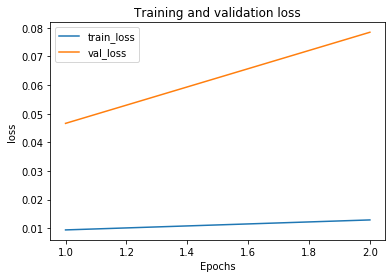

In [24]:
plot_metric(history, 'loss')

* Should I enable early stopping?
->> yes 
* What parameters should I use related to early stopping?
->>     no. of nodes and no. of layers can be reduced 

In [26]:
def model_mnist():
    model= tf.keras.Sequential([
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(128, activation= tf.nn.relu),
      tf.keras.layers.Dropout(rate=0.2),
      tf.keras.layers.Dense(10,activation=tf.nn.softmax)])
    return(model)
m1=model_mnist()
m1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-1), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
BATCH_SIZE = 64
EPOCHS = 10
m1.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4073 - accuracy: 0.8832
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.2187 - accuracy: 0.9374
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1720 - accuracy: 0.9504
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.1463 - accuracy: 0.9577
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1281 - accuracy: 0.9629
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1161 - accuracy: 0.9658
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1040 - accuracy: 0.9700
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0982 - accuracy: 0.9711
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0885 - accuracy: 0.9738
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0841 - accuracy: 0.9750

In [27]:
test_loss, test_acc = m1.evaluate(test_images,test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0774 - accuracy: 0.9768
Test accuracy: 0.9768000245094299


In [32]:
early_stopping = EarlyStopping()
history = m1.fit(
    train_images, 
    train_labels, 
    epochs=10, 
    validation_split=0.1, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/10
1350/1350 - 3s - loss: 0.0688 - accuracy: 0.9792 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch 2/10
1350/1350 - 3s - loss: 0.0631 - accuracy: 0.9803 - val_loss: 0.0511 - val_accuracy: 0.9862


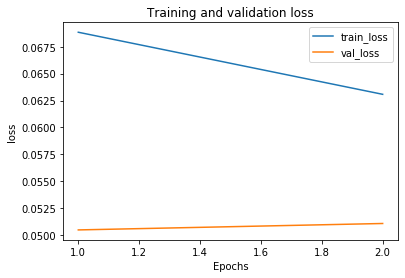

In [33]:
plot_metric(history, 'loss')